In [2]:
import sys
sys.path.append('..')
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
os.getcwd()
from gax import sersic
from gax.sersic import sersic_2d_linear_pix
from matplotlib import pyplot as plt
import jax
import jax.numpy as jnp
import astropy
import numpy as np
from astropy.table import Table, vstack
import gax_fits as gfits
from astropy.io import fits
from scipy.interpolate import RegularGridInterpolator

bands = np.array(['U','G','R','I','Z'])
wavs = np.array([354.3e-9, 477.0e-9, 623.1e-9, 762.5e-9, 913.4e-9], dtype=float)


In [3]:
# Import the CAS Data

# Original Images
C_Original_array = np.loadtxt('/home/borge/Data/MLIS1_Output/CAS_and_Flux_Fractions/CAS/C_Originals_export.txt')
A_Original_array = np.loadtxt('/home/borge/Data/MLIS1_Output/CAS_and_Flux_Fractions/CAS/A_Originals_export.txt')
S_Original_array = np.loadtxt('/home/borge/Data/MLIS1_Output/CAS_and_Flux_Fractions/CAS/S_Originals_export.txt')

# Isolated Images
C_Isolated_array = np.loadtxt('/home/borge/Data/MLIS1_Output/CAS_and_Flux_Fractions/CAS/C_Isolated_export.txt')
A_Isolated_array = np.loadtxt('/home/borge/Data/MLIS1_Output/CAS_and_Flux_Fractions/CAS/A_Isolated_export.txt')
S_Isolated_array = np.loadtxt('/home/borge/Data/MLIS1_Output/CAS_and_Flux_Fractions/CAS/S_Isolated_export.txt')


# Import the Flux Fraction Data
arm_fraction = np.loadtxt('/home/borge/Data/MLIS1_Output/CAS_and_Flux_Fractions/Flux_Fractions/arm_flux_frac_candidates.txt')
bulge_fraction = np.loadtxt('/home/borge/Data/MLIS1_Output/CAS_and_Flux_Fractions/Flux_Fractions/bulge_flux_frac_candidates.txt')




In [4]:
# Import the Final candidate list
candidate_list = np.loadtxt('/home/borge/Data/MLIS1_Output/CAS_and_Flux_Fractions/File_lists/Candidate_list_post_failures.txt',dtype=str)

In [5]:
candidate_list.shape

(959,)

In [6]:
candidate_int = candidate_list.astype(int)


In [7]:
# Import the GZ2 Table
GZ2 = gfits.Read_Table('/home/borge/Data/gz2and1master.fits.gz')

In [8]:
# Isolate a candidate table using masking
candidate_mask = np.isin(np.asarray(GZ2['OBJID']),candidate_int)

GZ2_candidates = GZ2[candidate_mask]

GZ2_candidates

OBJID,OBJID_STR,RUN,RERUN,CAMCOL,FIELD,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,PETROMAGERR_U,PETROMAGERR_G,PETROMAGERR_R,PETROMAGERR_I,PETROMAGERR_Z,PSFMAG_R,FIBERMAG_R,DEVMAG_R,DEVMAGERR_R,EXPMAG_R,EXPMAGERR_R,FRACDEV_R,MU50_R,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,ROWC_U,COLC_U,ROWC_G,COLC_G,ROWC_R,COLC_R,ROWC_I,COLC_I,ROWC_Z,COLC_Z,CMODELMAG_R,CMODELMAGERR_R,REDSHIFT,REDSHIFTERR,PETROMAG_MU,PETROMAG_MG,PETROMAG_MR,PETROMAG_MI,PETROMAG_MZ,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,REGION,PETROR50_R_KPC_SIMPLE_BIN,PETROMAG_MR_SIMPLE_BIN,REDSHIFT_SIMPLE_BIN,WVT_BIN,sample,asset_id,total_count,total_weight,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_total_weight,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_total_weight,t03_bar_a06_bar_weight,t03_bar_a06_bar_weighted_fraction,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_weighted_fraction,t03_bar_total_weight,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_total_weight,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_total_weight,t06_odd_a14_yes_weight,t06_odd_a14_yes_weighted_fraction,t06_odd_a15_no_weight,t06_odd_a15_no_weighted_fraction,t06_odd_total_weight,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_weighted_fraction,t07_rounded_total_weight,t08_odd_feature_a19_ring_weight,t08_odd_feature_a19_ring_weighted_fraction,t08_odd_feature_a20_lens_or_arc_weight,t08_odd_feature_a20_lens_or_arc_weighted_fraction,t08_odd_feature_a21_disturbed_weight,t08_odd_feature_a21_disturbed_weighted_fraction,t08_odd_feature_a22_irregular_weight,t08_odd_feature_a22_irregular_weighted_fraction,t08_odd_feature_a23_other_weight,t08_odd_feature_a23_other_weighted_fraction,t08_odd_feature_a24_merger_weight,t08_odd_feature_a24_merger_weighted_fraction,t08_odd_feature_a38_dust_lane_weight,t08_odd_feature_a38_dust_lane_weighted_fraction,t08_odd_feature_total_weight,t09_bulge_shape_a25_rounded_weight,t09_bulge_shape_a25_rounded_weighted_fraction,t09_bulge_shape_a26_boxy_weight,t09_bulge_shape_a26_boxy_weighted_fraction,t09_bulge_shape_a27_no_bulge_weight,t09_bulge_shape_a27_no_bulge_weighted_fraction,t09_bulge_shape_total_weight,t10_arms_winding_a28_tight_weight,t10_arms_winding_a28_tight_weighted_fraction,t10_arms_winding_a29_medium_weight,t10_arms_winding_a29_medium_weighted_fraction,t10_arms_winding_a30_loose_weight,t10_arms_winding_a30_loose_weighted_fraction,t10_arms_winding_total_weight,t11_arms_number_a31_1_weight,t11_arms_number_a31_1_weighted_fraction,t11_arms_number_a32_2_weight,t11_arms_number_a32_2_weighted_fraction,t11_arms_number_a33_3_weight,t11_arms_number_a33_3_weighted_fraction,t11_arms_number_a34_4_weight,t11_arms_number_a34_4_weighted_fraction,t11_arms_number_a36_more_than_4_weight,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_total_weight,U,G,R

0.381420912667783
-0.15049133295689965 1.0657099934095486
-0.04819720118294074 0.38129636101511133
-0.0499080309191328 0.336238664746792
-0.06122495898986041 0.33558884864285243
-0.056157505519103965 0.5597977199016653


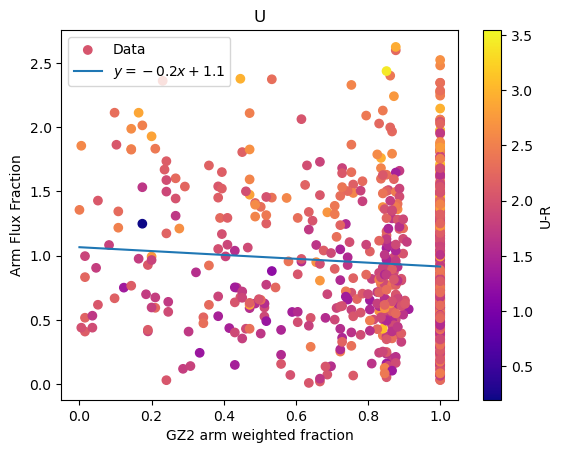

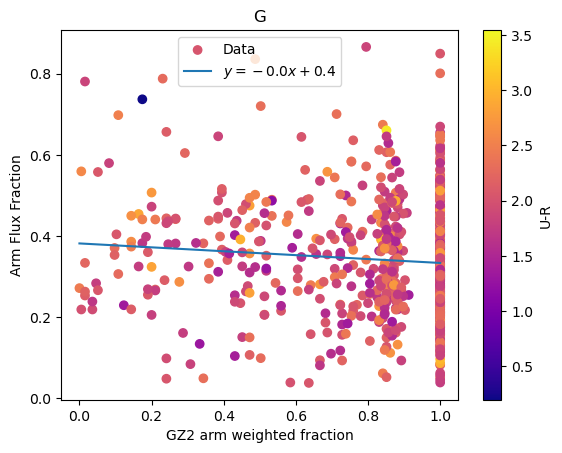

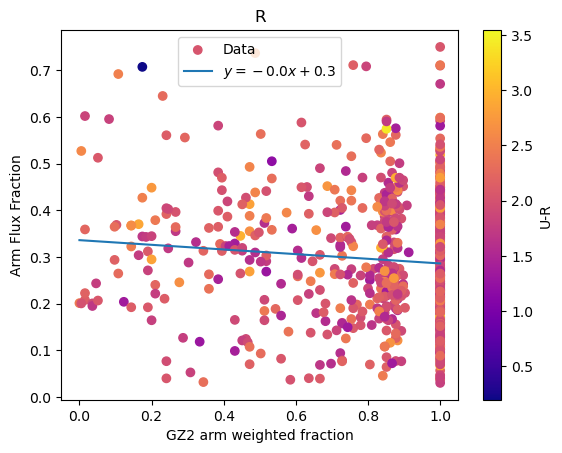

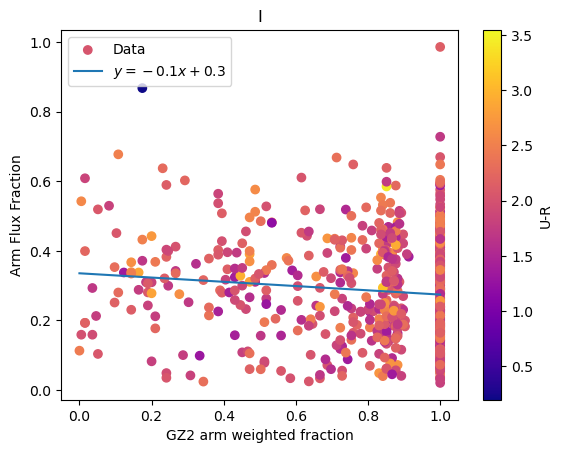

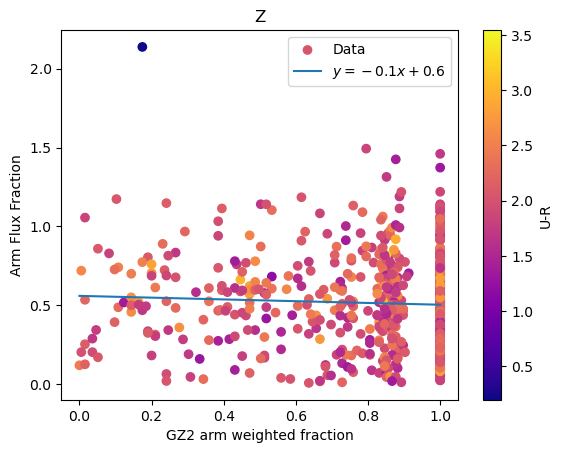

In [41]:
# Now wish to plot Arm flux fraction against the weighted arm fraction

# First create a modified candidate table for polyfitting

# Create a list of the Flux Fraction Nan rows
nan_rows = np.isnan(arm_fraction).any(axis=1)

# Look at where most of the nan's occured
nan_positions = np.isnan(arm_fraction)
#print(np.argwhere(nan_positions==True))

candidates_nan_cleaned_arms = candidate_list[~nan_rows]


candidate_mask = np.isin(np.asarray(GZ2['OBJID']),candidates_nan_cleaned_arms)

GZ2_candidates = GZ2[candidate_mask]
#print(GZ2_candidates)


arm_weighted_fractions = np.asarray(GZ2_candidates['t04_spiral_a08_spiral_weighted_fraction']) #Total number of people
Colour = np.asarray(GZ2_candidates['U'] - GZ2_candidates['R'])

# Apply mask to arm fraction
arm_fraction_cleaned = arm_fraction[~nan_rows]

# Arange polyfit params
x = np.linspace(0,1,100)

def normalizzzze(arr):
    return (arr-np.min(arr))/(np.max(arr)-np.min(arr))

print(np.std(arm_fraction_cleaned))
for i in range(0,len(bands)):
    m,c = np.polyfit(normalizzzze(arm_weighted_fractions),arm_fraction_cleaned[:,i],1)#,w=np.std(arm_fraction_cleaned[:,i]))
    print(m,c)
    plt.figure()
    plt.title(bands[i])
    plt.scatter(normalizzzze(arm_weighted_fractions),arm_fraction_cleaned[:,i],c=Colour,cmap='plasma')
    plt.plot(x,m*x+c)
    plt.colorbar(label='U-R')
    plt.legend(['Data','$y = {} x + {}$'.format(np.around(m,1),np.around(c,1))])
    plt.xlabel('GZ2 arm weighted fraction')
    plt.ylabel('Arm Flux Fraction')



766
(766,)
0.06394988235472561
0.00047732853242144526 0.03791347122780082
6.89504574568517e-05 0.05458050419542791
9.058019904978244e-05 0.05983568254324566
-4.3353951063120215e-05 0.06610242344631817
-0.0003822154718762206 0.06832243458910522


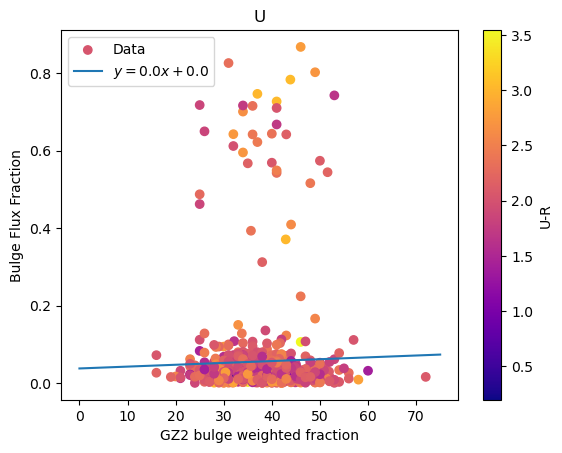

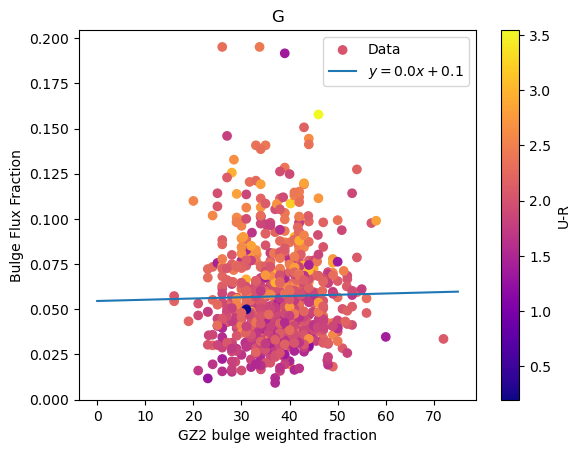

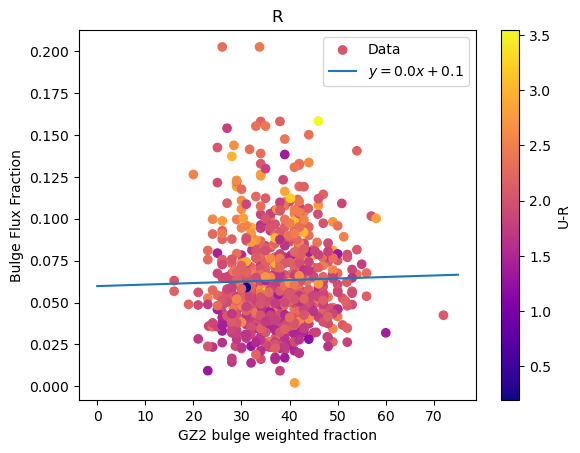

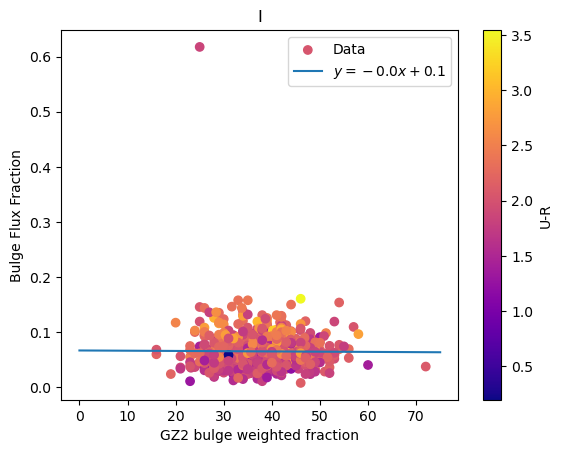

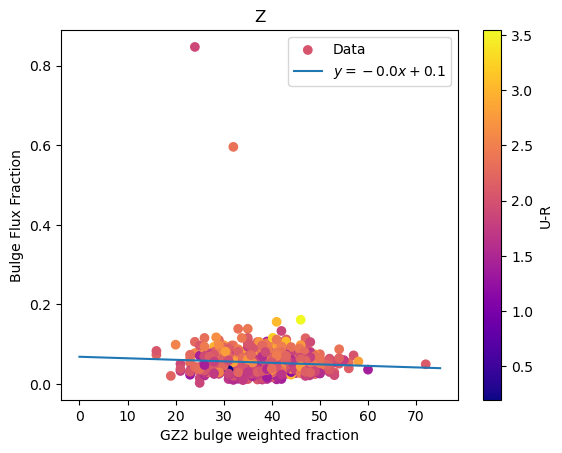

In [42]:
# Now wish to plot Bulge flux fraction against the weighted bulge fraction

# First create a modified candidate table for polyfitting

# Create a list of the Flux Fraction Nan rows
nan_rows = np.isnan(bulge_fraction).any(axis=1)

# Look at where most of the nan's occured
nan_positions = np.isnan(bulge_fraction)
#print(np.argwhere(nan_positions==True))

candidates_nan_cleaned_bulges = candidate_list[~nan_rows]


candidate_mask = np.isin(np.asarray(GZ2['OBJID']),candidates_nan_cleaned_bulges)

GZ2_candidates = GZ2[candidate_mask]
print(len(GZ2_candidates))


bulge_weighted_fractions = np.asarray(GZ2_candidates['t05_bulge_prominence_total_weight'])
Colour = np.asarray(GZ2_candidates['U'] - GZ2_candidates['R'])
Brightness = np.asarray(np.average([GZ2_candidates['U'], GZ2_candidates['G'], GZ2_candidates['R'], GZ2_candidates['I'], GZ2_candidates['Z']],axis=0))
print(Brightness.shape)
# Apply mask to bulge fraction
bulge_fraction_cleaned = bulge_fraction[~nan_rows]

# Arange polyfit params
x = np.linspace(0,75,100)

print(np.std(bulge_fraction_cleaned))
for i in range(0,len(bands)):
    m,c = np.polyfit(bulge_weighted_fractions,bulge_fraction_cleaned[:,i],1)#,w=np.std(bulge_fraction_cleaned[:,i]))
    print(m,c)
    plt.figure()
    plt.title(bands[i])
    plt.scatter(bulge_weighted_fractions,bulge_fraction_cleaned[:,i],c=Colour,cmap='plasma')
    plt.plot(x,m*x+c)
    plt.colorbar(label='U-R')
    plt.legend(['Data','$y = {} x + {}$'.format(np.around(m,1),np.around(c,1))])
    plt.xlabel('GZ2 bulge weighted fraction')
    plt.ylabel('Bulge Flux Fraction')

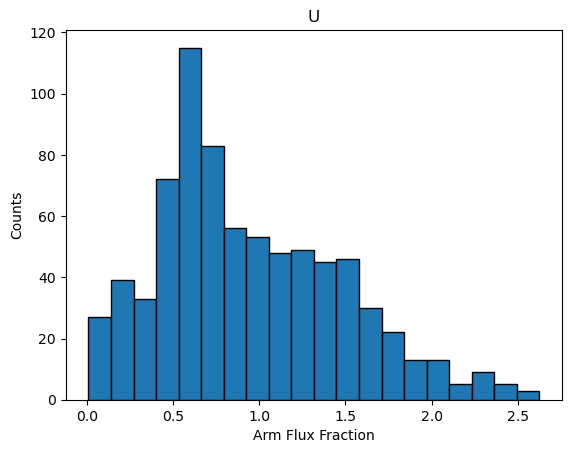

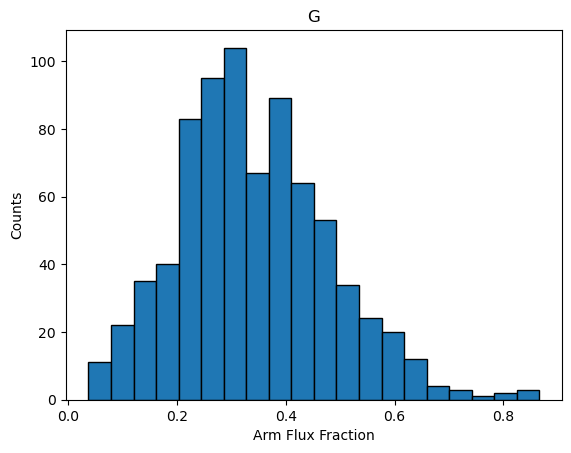

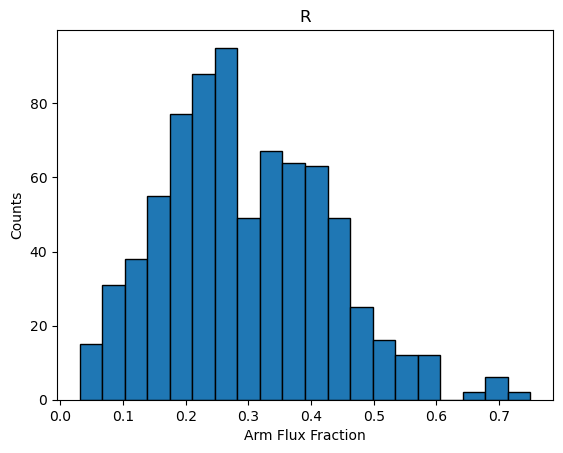

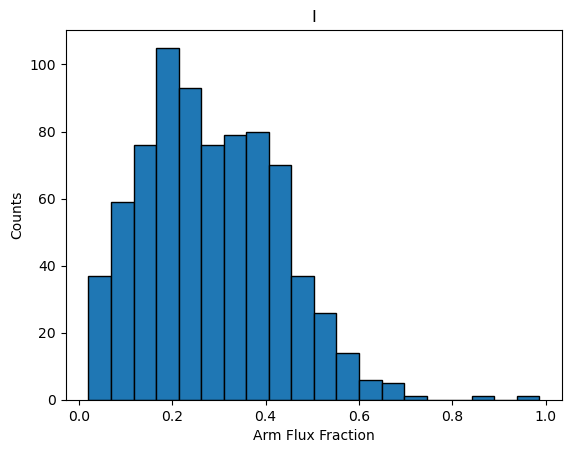

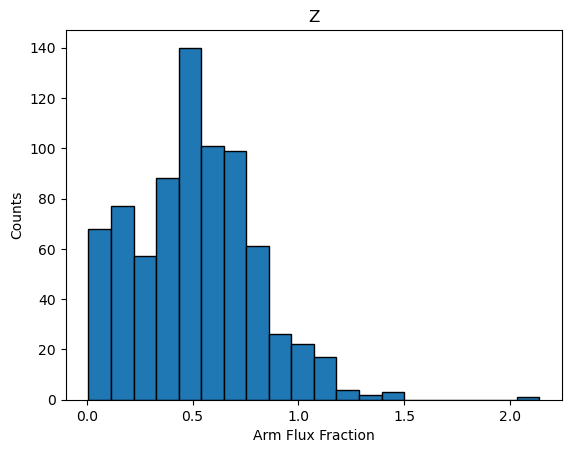

In [43]:
# Create Some histograms:
N = 20
for i in range(0,len(bands)):
    plt.figure()
    plt.title(bands[i])
    #plt.xlim(0,1)
    plt.hist(arm_fraction_cleaned[:,i],bins=N,edgecolor='black')
    plt.ylabel('Counts')
    plt.xlabel('Arm Flux Fraction')

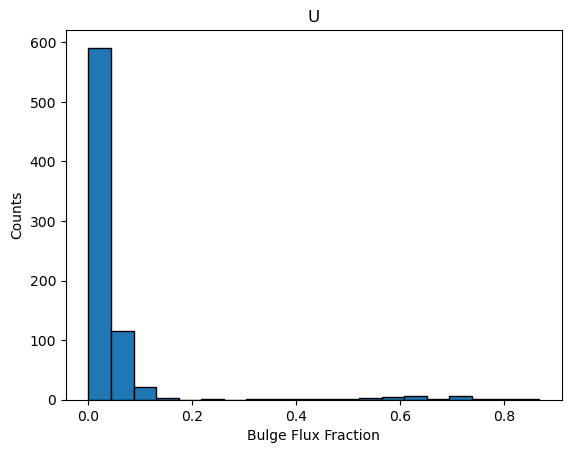

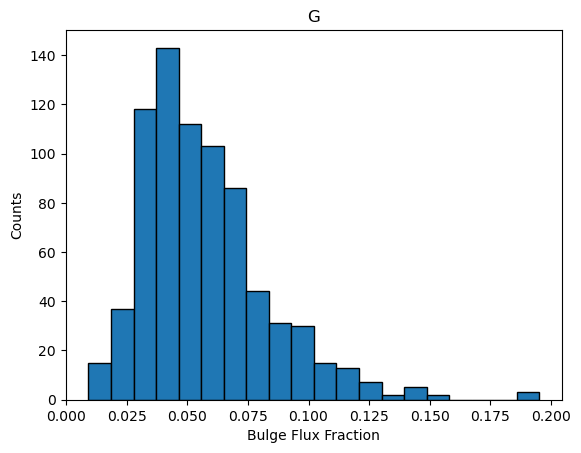

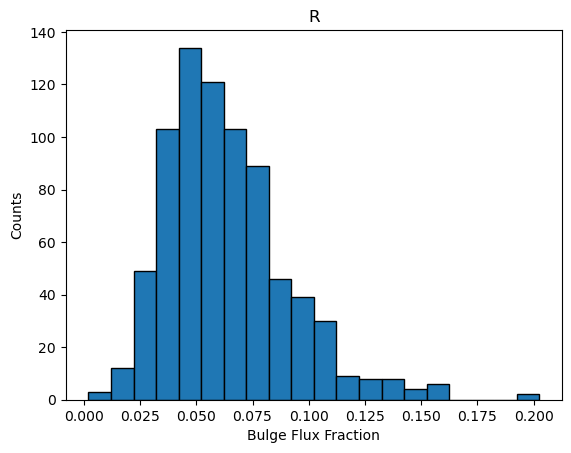

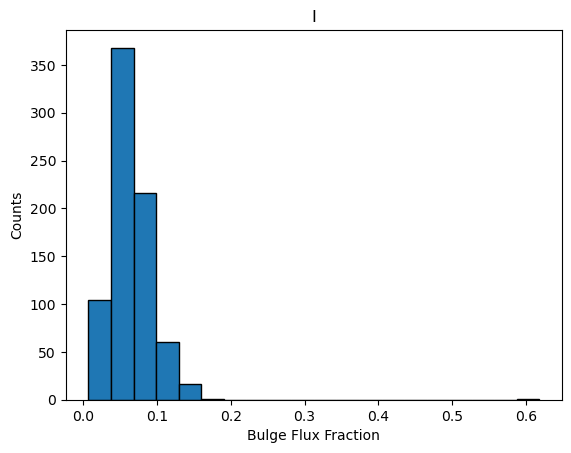

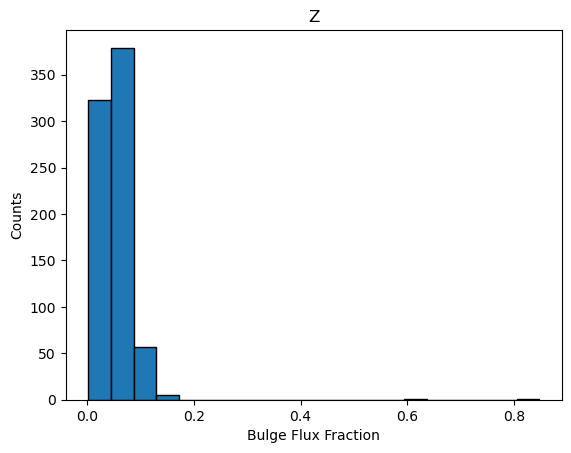

In [44]:
# Create Some histograms:
N = 20
for i in range(0,len(bands)):
    plt.figure()
    plt.title(bands[i])
    plt.hist(bulge_fraction_cleaned[:,i],bins=N,edgecolor='black')
    plt.ylabel('Counts')
    plt.xlabel('Bulge Flux Fraction')

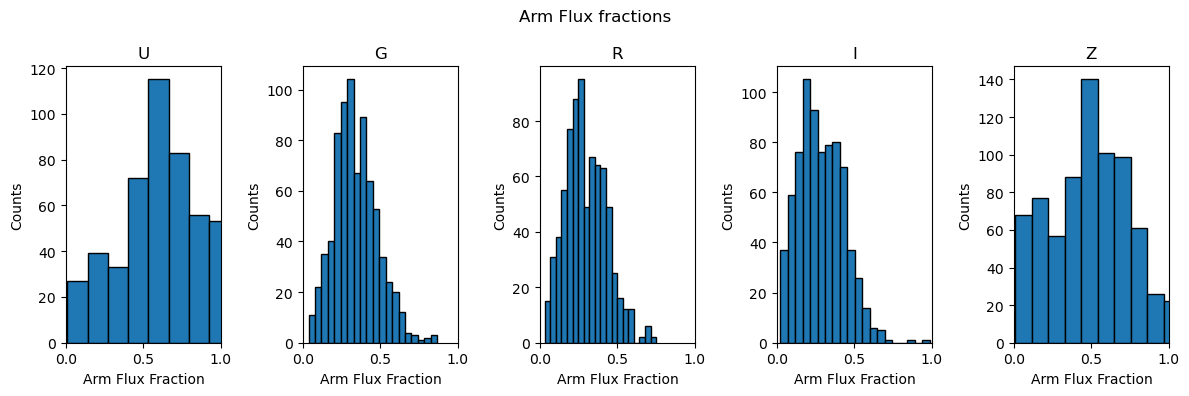

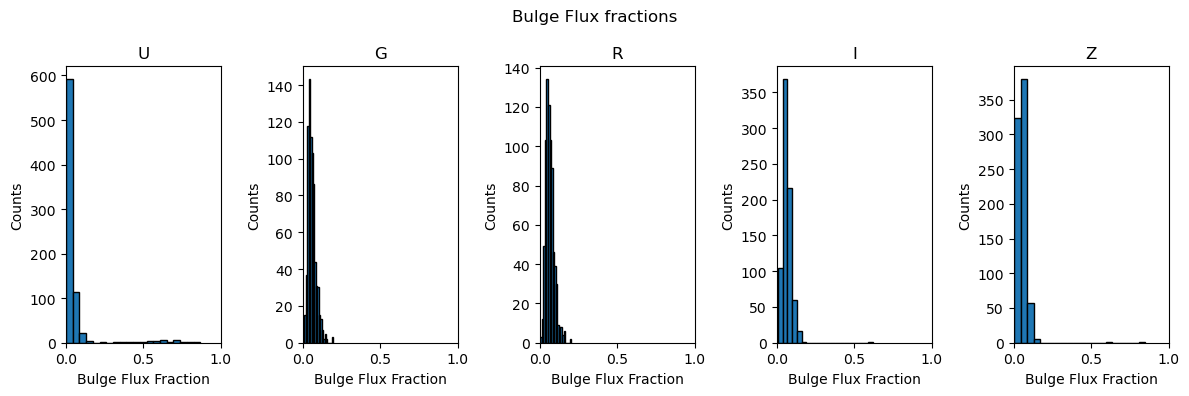

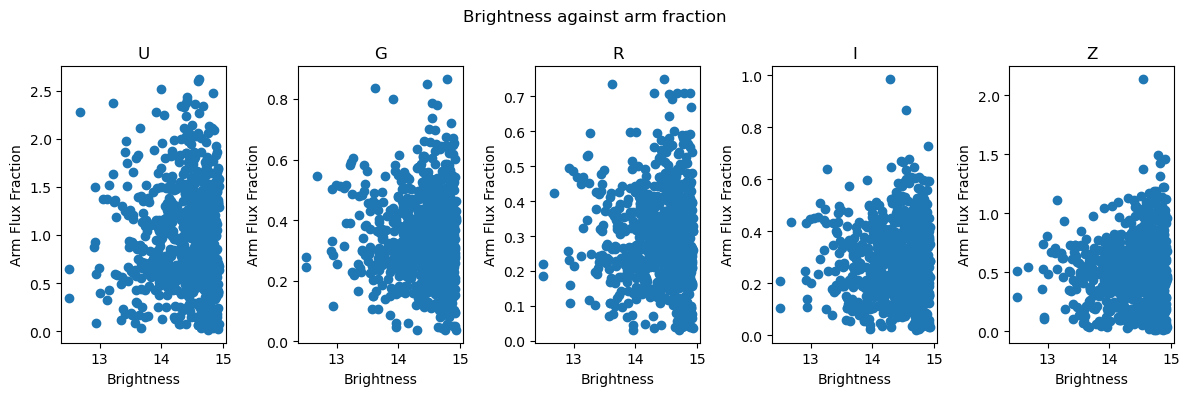

In [45]:
# Clean up into Subplot loops and attempt to plot envelope

N = 20
fig, ax = plt.subplots(nrows=1, ncols=len(bands), figsize=(12, 4))
fig.suptitle('Arm Flux fractions')

for i in range(len(bands)):
    ax[i].set_title(bands[i])
    n, bins, patches = ax[i].hist(arm_fraction_cleaned[:,i], bins=N, edgecolor='black')
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    #ax[i].plot(bin_centers, n, '-', color='red', linewidth=2)
    ax[i].set_ylabel('Counts')
    ax[i].set_xlabel('Arm Flux Fraction')
    ax[i].set_xlim(0,1)
plt.tight_layout()
plt.show()




fig, ax = plt.subplots(nrows=1, ncols=len(bands), figsize=(12, 4))
fig.suptitle('Bulge Flux fractions')

for i in range(len(bands)):
    ax[i].set_title(bands[i])
    n, bins, patches = ax[i].hist(bulge_fraction_cleaned[:,i], bins=N, edgecolor='black')
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    #ax[i].plot(bin_centers, n, '-', color='red', linewidth=2)
    ax[i].set_ylabel('Counts')
    ax[i].set_xlabel('Bulge Flux Fraction')
    ax[i].set_xlim(0,1)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(nrows=1, ncols=len(bands), figsize=(12, 4))
fig.suptitle('Brightness against arm fraction')

for i in range(len(bands)):
    ax[i].set_title(bands[i])
    ax[i].scatter(Brightness,arm_fraction_cleaned[:,i])
    ax[i].set_ylabel('Arm Flux Fraction')
    ax[i].set_xlabel('Brightness')
plt.tight_layout()
plt.show()

In [46]:
# Now we will create a mask for the candidates that are above 1 in the U and the Z

U_above_one_mask = arm_fraction_cleaned[:,0] > 1
Z_above_one_mask = arm_fraction_cleaned[:,4] > 1

U_above_one_ordered_mask = np.argsort(U_above_one_mask)
Z_above_one_ordered_mask = np.argsort(Z_above_one_mask)

U_band_above_one_candidates = candidates_nan_cleaned_bulges[U_above_one_mask]
Z_band_above_one_candidates = candidates_nan_cleaned_bulges[Z_above_one_mask]

In [47]:
U_band_above_one_candidates.shape

(311,)

In [48]:
Z_band_above_one_candidates.shape

(40,)

In [49]:
Z_band_above_one_candidates

array(['587725039019950218', '587725551205351526', '587725818552385730',
       '587726032773447847', '587726033324802087', '587728309103427790',
       '587731187282477155', '587731891112312931', '587733442656010331',
       '587734623237308486', '587736546847096896', '587736915150766288',
       '587736946276171915', '587738409792045167', '587739457229291526',
       '587739506087493770', '587739609169526803', '587739707946500122',
       '587739720834941082', '587739720843526344', '587741488766255128',
       '587741490362384441', '587741533304193140', '587741600951828497',
       '587741601490993168', '587741708868255991', '587741708880773200',
       '587742645700984963', '587742953861021802', '588010358005039204',
       '588013382738837525', '588013383821033593', '588017111292575748',
       '588017978903429204', '588017978911752434', '588017979954561092',
       '588017979976187962', '588017991770308870', '588023668629700748',
       '588297864190296100'], dtype='<U18')

In [129]:
# Now want to examine the most spiral and least spiral according to the histograms

# only want to examine GRI due to the background fitting issue

least_spiral = np.argwhere(arm_fraction_cleaned == np.min(arm_fraction_cleaned[:,1:3]))


most_spiral = np.argwhere(arm_fraction_cleaned == np.max(arm_fraction_cleaned[:,1:3]))



least_fractions = arm_fraction_cleaned[least_spiral[0,0]]*100
most_fractions  = arm_fraction_cleaned[most_spiral[0,0]]*100

least_spiral_candidate = candidates_nan_cleaned_arms[least_spiral[0,0]]
most_spiral_candidate =  candidates_nan_cleaned_arms[most_spiral[0,0]]

print(least_fractions,most_fractions)

[6.40942844 4.51556253 3.05050056 2.03991521 2.5033314 ] [98.         86.62521013 70.83970424 98.         98.        ]


U : mean -  0.9409864517558417 std dev -  0.5332675812226634
G : mean -  0.3413956480528161 std dev -  0.13897947545068387
R : mean -  0.2949216179610441 std dev -  0.13175814052526544
I : mean -  0.2856516261229288 std dev -  0.14641388176637388
Z : mean -  0.5126367202425701 std dev -  0.28175253080145757


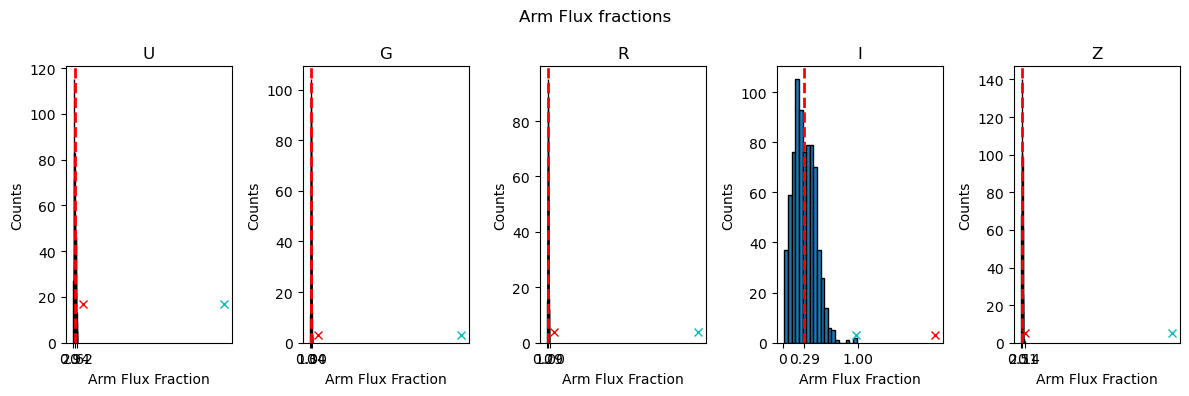

140.0


In [130]:
N = 20
fig, ax = plt.subplots(nrows=1, ncols=len(bands), figsize=(12, 4))
fig.suptitle('Arm Flux fractions')

heights = np.array([17,3,4,3,5])

for i in range(len(bands)):
    if i == 0 or i == 4:
        top = np.max(arm_fraction_cleaned[:,i])
        
    elif i == 3:
        most_fractions[i] = 0.98
    else:
        top = 1
    ax[i].set_title(bands[i])
    n, bins, patches = ax[i].hist(arm_fraction_cleaned[:,i], bins=N, edgecolor='black')
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    ax[i].set_ylabel('Counts')
    ax[i].set_xlabel('Arm Flux Fraction')
    mean_value = np.mean(arm_fraction_cleaned[:,i])
    ax[i].axvline(mean_value,0,np.max(n), color='red', linestyle='--', linewidth=2)  # Add axvline for mean
    ax[i].plot(least_fractions[i],heights[i],'rx')
    ax[i].plot(most_fractions[i],heights[i],'cx')
    ax[i].set_xticks([0,mean_value,top])  # Set the xtick to the mean value
    ax[i].set_xticklabels(['0',f"{mean_value:.2f}",f'{top:.2f}'])
    print(bands[i],': mean - ',np.mean(arm_fraction_cleaned[:,i]),'std dev - ',np.std(arm_fraction_cleaned[:,i]))
plt.tight_layout()
plt.show()
print(np.max(n))

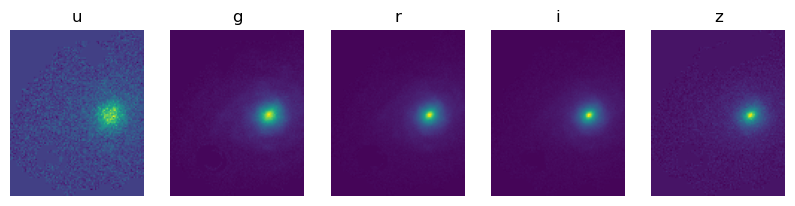

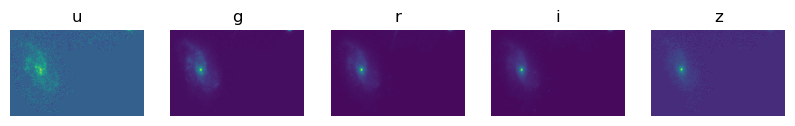

In [51]:
least_spiral_comp = gfits.Read_M_band(least_spiral_candidate,'/home/borge/Data/Most_and_Least/Arm/')
most_spiral_comp = gfits.Read_M_band(most_spiral_candidate,'/home/borge/Data/Most_and_Least/Arm/')

gfits.Composite_imshow(least_spiral_comp)

gfits.Composite_imshow(most_spiral_comp)

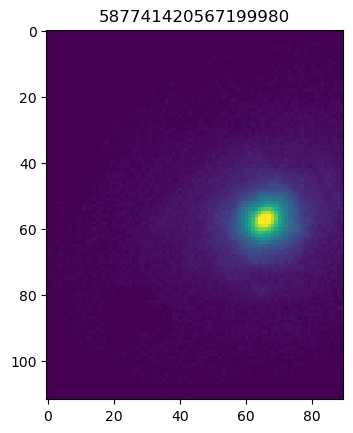

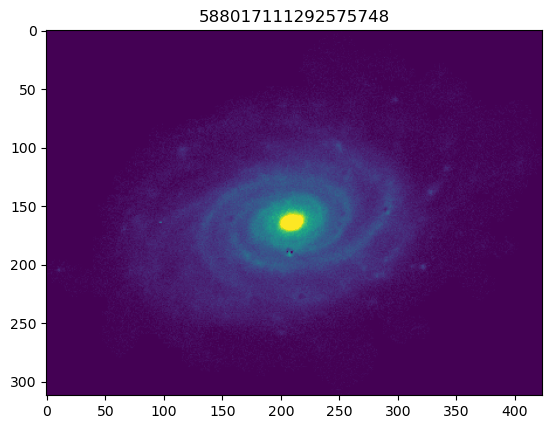

In [52]:
# Look in R band
R_least_spiral = least_spiral_comp[:,:,2]
R_most_spiral  = gfits.Read('/home/borge/Data/Test_batch/587741603105210388ra.fits.gz')

plt.figure()
plt.title(least_spiral_candidate)
plt.imshow(R_least_spiral,vmin=1000,vmax=1800)

plt.figure()
plt.title(most_spiral_candidate)
plt.imshow(R_most_spiral,vmin=1000,vmax=1300)



In [118]:
least_GZ2_table['RA'],least_GZ2_table['DEC'],most_GZ2_table['RA'],most_GZ2_table['DEC'] # 0.869 # 1

(<Column name='RA' dtype='float64' length=1>
 137.52161897,
 <Column name='DEC' dtype='float64' length=1>
 22.83832915,
 <Column name='RA' dtype='float64' length=1>
 183.34246826171875,
 <Column name='DEC' dtype='float64' length=1>
 28.510963439941406)

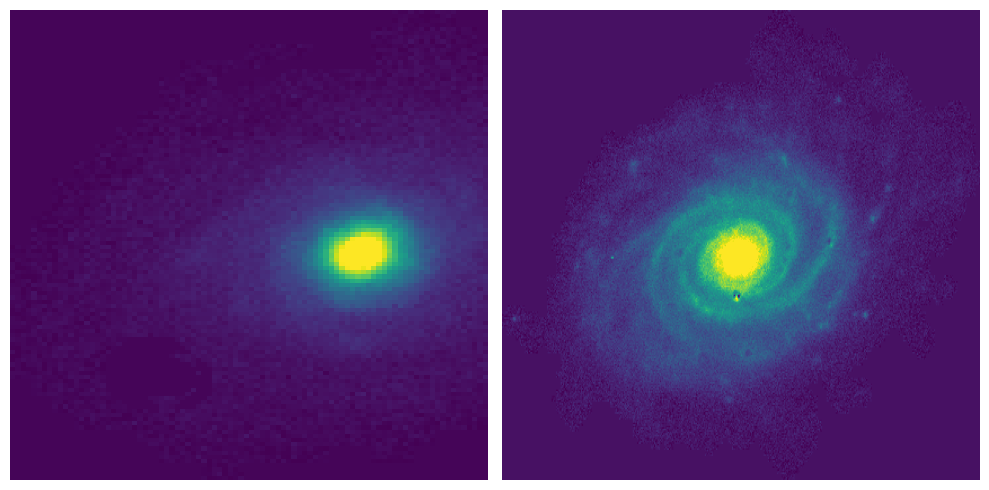

In [120]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for least_spiral_candidate
axs[0].imshow(R_least_spiral, vmin=np.percentile(R_least_spiral, 0.5), vmax=np.percentile(R_least_spiral, 99.5),aspect='auto')
#axs[0].set_title('IC 2442')
axs[0].axis('off')

# Plot for most_spiral_candidate
axs[1].imshow(R_most_spiral, vmin=np.percentile(R_most_spiral, 0.5), vmax=np.percentile(R_most_spiral, 99.5),aspect='auto')
#axs[1].set_title('NGC 4185')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [85]:
# Go and get the flux fraction values for each
least_flux_frac = [np.argwhere(candidates_nan_cleaned_arms == most_spiral_candidate)]


'587741420567199980'

In [53]:
# Get the GZ2 Spiral weighted fractions

least_GZ2_table = gfits.cat_search(GZ2,least_spiral_candidate)

most_GZ2_table = gfits.cat_search(GZ2,'587741603105210388')

most_arm_weight  = most_GZ2_table['t04_spiral_a08_spiral_weighted_fraction']  
least_arm_weight = least_GZ2_table['t04_spiral_a08_spiral_weighted_fraction']

least_arm_weight,most_arm_weight

(<Column name='t04_spiral_a08_spiral_weighted_fraction' dtype='float32' length=1>
 1.0,
 <Column name='t04_spiral_a08_spiral_weighted_fraction' dtype='float32' length=1>
 0.969)

(767,) (767, 5)


Text(0.5, 0, 'U-R')

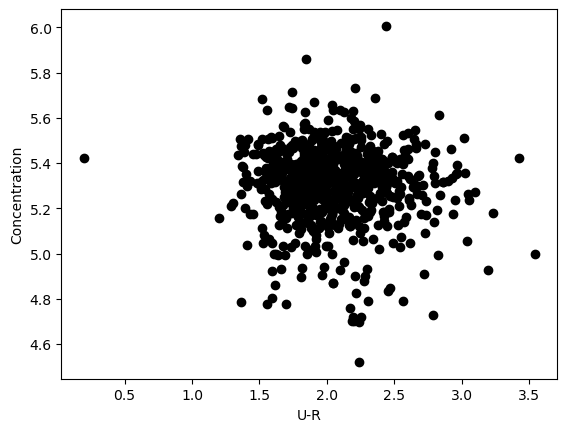

In [54]:
# Now wish to plot Concentration against Colour

candidate_mask = np.isin(np.asarray(GZ2['OBJID']),candidate_list)

GZ2_candidates = GZ2[candidate_mask]

# First filter out any nan rows
nan_rows = np.isnan(C_Original_array).any(axis=1)

C_Originals = C_Original_array[~nan_rows]
C_Isolateds = C_Isolated_array[~nan_rows]

Concentration_candidates = GZ2_candidates[~nan_rows]

Colour = np.asarray(Concentration_candidates['U'] - Concentration_candidates['R'])
print(Colour.shape,C_Originals.shape)
# Plot the Colour against the concentration
plt.figure()
#plt.scatter(Colour,C_Isolateds[:,1],c='r',marker='x')
plt.scatter(Colour,C_Originals[:,1],c='k')

plt.ylabel('Concentration')
plt.xlabel('U-R')

# This is so shit


In [55]:
# Try and get rid of the data that is clearly anomalous or outlying

G_arm_frac  = arm_fraction_cleaned[:,1]

# Create a mask using mean and std
X = 3

Outlier_mask_G = (np.mean(G_arm_frac)- X*np.std(G_arm_frac) < G_arm_frac) & (G_arm_frac < np.mean(G_arm_frac)+ X*np.std(G_arm_frac))


np.argwhere(Outlier_mask_G == False)


array([[104],
       [229],
       [579],
       [596],
       [642],
       [708]])

Text(0, 0.5, 'normalised Arm flux fraction')

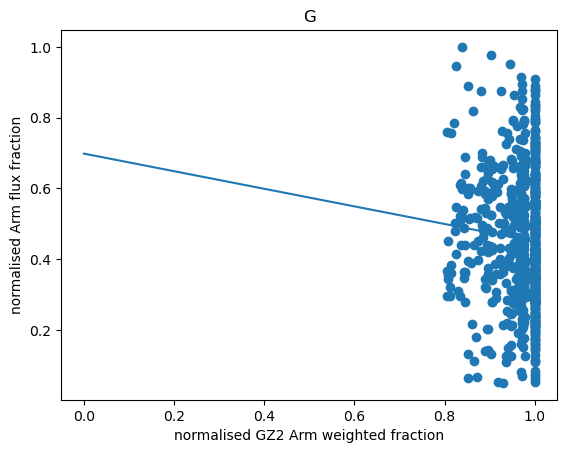

In [56]:
# Try  mask
x = np.linspace(0,1,10)


plt.figure()
plt.title('G')
m,c = np.polyfit(arm_weighted_fractions[Outlier_mask_G]/np.max(arm_weighted_fractions[Outlier_mask_G]),G_arm_frac[Outlier_mask_G]/np.max(G_arm_frac[Outlier_mask_G]),1)
plt.plot(x,m*x+c)
plt.scatter(arm_weighted_fractions[Outlier_mask_G]/np.max(arm_weighted_fractions[Outlier_mask_G]),G_arm_frac[Outlier_mask_G]/np.max(G_arm_frac[Outlier_mask_G]))
plt.xlabel('normalised GZ2 Arm weighted fraction')
plt.ylabel('normalised Arm flux fraction')

In [57]:
# Create azimuthal averaging tool to check the background level

# First need to identify candidates that are over 1 in U and Z
test_candidate_U = U_band_above_one_candidates[0]
test_candidate_Z = Z_band_above_one_candidates[0]

print(test_candidate_U,test_candidate_Z)
# Get composites from test candidates

test_table_U, test_comp_U = gfits.Composite_from_directory_raid(test_candidate_U,'/home/borge/Data/Broken_Fractions/')
test_table_Z, test_comp_Z = gfits.Composite_from_directory_raid(test_candidate_Z,'/home/borge/Data/Broken_Fractions/')

# Get originals 

test_original_comp_U = gfits.Read_M_band(test_candidate_U,'/home/borge/Data/Broken_Fractions/Originals/')
test_original_comp_Z = gfits.Read_M_band(test_candidate_Z,'/home/borge/Data/Broken_Fractions/Originals/')

# Get flux fractions and check:

flux_fractions_test_U = np.empty(len(bands))

flux_fractions_test_Z = np.empty(len(bands))


for i in range(0,len(bands)):
    flux_fractions_test_U[i] = gfits.flux_fraction(test_comp_U[:,:,i],test_table_U[i],test_original_comp_U[:,:,i],False)
    flux_fractions_test_Z[i] = gfits.flux_fraction(test_comp_Z[:,:,i],test_table_Z[i],test_original_comp_Z[:,:,i],False)
    
flux_fractions_test_U, flux_fractions_test_Z

# Nice so these are problem flux fractions

587722981742084144 587725039019950218


(array([1.26154562, 0.50238052, 0.40023732, 0.42163405, 0.7609108 ]),
 array([1.81080497, 0.49780395, 0.43972581, 0.5653895 , 1.11301104]))

In [192]:
bad_cand_table = gfits.cat_search(GZ2,test_candidate_U)
RA_bad  = bad_cand_table['RA']
DEC_bad = bad_cand_table['DEC']
RA_bad,DEC_bad

(<Column name='RA' dtype='float64' length=1>
 184.53564453125,
 <Column name='DEC' dtype='float64' length=1>
 -1.0641142129898071)

<a list of 6 text.Text objects>

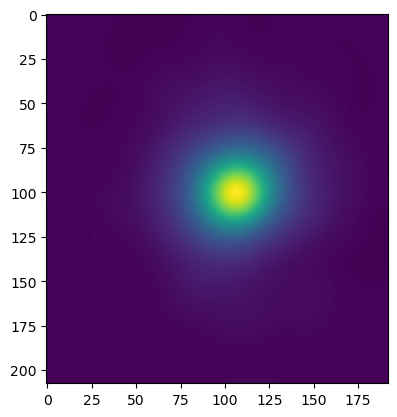

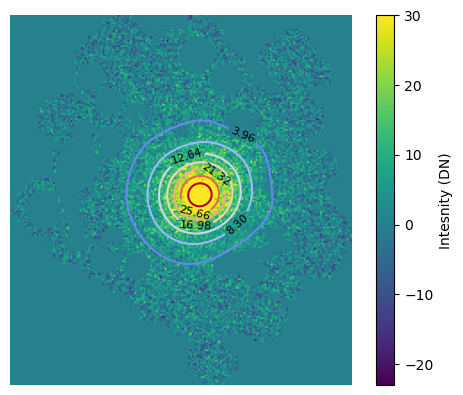

In [202]:
from scipy.ndimage import gaussian_filter
# Create a function that calculates the sum of an imag multiplied by anulus mask

# Start with test image U
image_w_background = test_original_comp_Z[:,:,4] -1000
table = test_table_Z[4]

# Get central co-ordinates
x0 = int(table['x'] + image_w_background.shape[1]/2)
y0 = int(table['y'] + image_w_background.shape[0]/2)

smoothed_image = gaussian_filter(image_w_background, sigma=10)
plt.imshow(smoothed_image)
# test plot
cap=30
N_levels = 8
plt.figure()
#plt.title(test_candidate_U)
plt.imshow(image_w_background,vmin=np.min(image_w_background),vmax=cap,cmap='viridis')
plt.colorbar(label='Intesnity (DN)')
#plt.plot(x0,y0,'kx')
plt.axis('off')
contour_levels = np.linspace(np.min(smoothed_image), cap, N_levels)
contours = plt.contour(smoothed_image, levels=contour_levels, cmap='coolwarm')
plt.clabel(contours, inline=True, fontsize=8,colors='black')

/tmp/ipykernel_471/3041829273.py:40: RuntimeWarning: invalid value encountered in scalar divide
  azimuth_averaged_intensity[s] = float(np.sum(mask*image)/float(mask_count[s]))


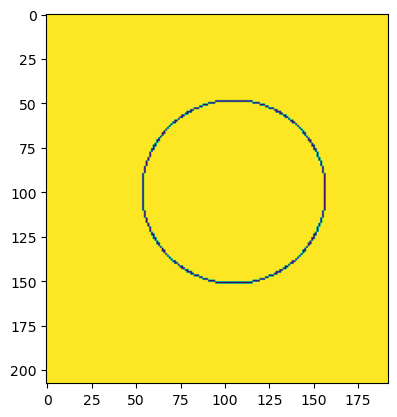

In [203]:
# Create an anulus mask

image = image_w_background - 1000
#image[x0+12,y0+20]=-1200.0
step=1.0
# First find maximum radius 
max_radius = min(x0, y0, image.shape[0]-x0, image.shape[1]-y0)*2

# Create an array of radii steps
anulus_radii = np.arange(0,max_radius-1,step)+1

# Create a loop that masks using these radii
azimuth_averaged_intensity = np.empty_like(anulus_radii)
mask_count = np.empty_like(anulus_radii)
azimuth_averaged_intensity_uncertainty =np.empty_like(anulus_radii)

for s in range(0,len(azimuth_averaged_intensity)):
    
    mask = np.empty_like(image)
    mask_count[s] = 0
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            r = np.sqrt((x0 - j)**2 + (y0 - i)**2)
            if (r >= anulus_radii[s]) & (r < anulus_radii[s]+step):
                mask[i,j] = 1
                mask_count[s] += 1
            else:
                mask[i,j] = 0
    if s == 0:
        azimuth_averaged_intensity[s] = np.sum(mask*image)
        azimuth_averaged_intensity_uncertainty[s] = 0.0
        
    elif s == 50:
        plt.figure()
        plt.imshow(image*mask)#,vmin=800,vmax=1050)
        azimuth_averaged_intensity[s] = float(np.sum(mask*image)/float(mask_count[s]))
        azimuth_averaged_intensity_uncertainty[s] = np.std(mask*image)
        
    else:
        azimuth_averaged_intensity[s] = float(np.sum(mask*image)/float(mask_count[s]))
        azimuth_averaged_intensity_uncertainty[s] = np.std(mask*image)
    
        
        #azimuth_averaged_intensity[s] = (np.sum(mask*image) - np.abs(azimuth_averaged_intensity[s-1])*mask_count[s-1])/(mask_count[s])
        

# Make this into a function:

def Azimuth_avg_intensity(image,table):
    
    # Get centre
    x0 = int(table['x'] + image.shape[1]/2)
    y0 = int(table['y'] + image.shape[0]/2)

    
    # Remove background
    image += -1000
    
    # First find maximum radius 
    max_radius = min(x0, y0, image.shape[0]-x0, image.shape[1]-y0)*2

    # Create an array of radii steps
    anulus_radii = np.arange(0,max_radius-1,step)+1

    # Create a loop that masks using these radii
    azimuth_averaged_intensity = np.empty_like(anulus_radii)
    mask_count = np.empty_like(anulus_radii)
    azimuth_averaged_intensity_uncertainty =np.empty_like(anulus_radii)

    for s in range(0,len(azimuth_averaged_intensity)):
        
        mask = np.empty_like(image)
        mask_count[s] = 0
        for i in range(0,image.shape[0]):
            for j in range(0,image.shape[1]):
                r = np.sqrt((x0 - j)**2 + (y0 - i)**2)
                if (r >= anulus_radii[s]) & (r < anulus_radii[s]+step):
                    mask[i,j] = 1
                    mask_count[s] += 1
                else:
                    mask[i,j] = 0
        if s == 0:
            azimuth_averaged_intensity[s] = np.sum(mask*image)
            azimuth_averaged_intensity_uncertainty[s] = 0.0
            
        else:
            azimuth_averaged_intensity[s] = float(np.sum(mask*image)/float(mask_count[s]))
            azimuth_averaged_intensity_uncertainty[s] = np.std(mask*image)
    
    # Demonstrate the negative flux fraction
    negative_fraction = len(np.argwhere(image<0))/(image.shape[0]*image.shape[1])
    print(negative_fraction)
    
    return anulus_radii, azimuth_averaged_intensity,azimuth_averaged_intensity_uncertainty,negative_fraction
    


In [204]:
def simple_moving_average(signal, window_width):
    """
    Calculates the simple moving average of a signal with a specified window width.
    
    Parameters:
    signal (array-like): The input signal.
    window_width (int): The size of the moving window.
    
    Returns:
    array-like: The moving average of the signal.
    """
    weights = np.repeat(1.0, window_width) / window_width
    sma = np.convolve(signal, weights, 'valid')
    return sma

import pywt
import numpy as np

def wavelet_transform(signal, window_size, wavelet='db4'):
    """
    Performs a wavelet transform on a signal using the specified wavelet and
    window size.

    Args:
        signal (array-like): The input signal to be transformed.
        window_size (int): The size of the sliding window used to perform the
            wavelet transform.
        wavelet (str): The name of the wavelet to be used for the transform.
            Default is 'db4'.

    Returns:
        array-like: The wavelet coefficients for the transformed signal.
    """
    # Pad the signal so that its length is an integer multiple of the window size
    padded_length = int(np.ceil(len(signal) / window_size) * window_size)
    padded_signal = np.pad(signal, (0, padded_length - len(signal)), mode='constant')
    
    # Reshape the signal into a matrix with rows equal to the window size
    signal_matrix = padded_signal.reshape(-1, window_size)
    
    # Apply the wavelet transform to each window
    coeffs = []
    for window in signal_matrix:
        cA, cD = pywt.dwt(window, wavelet)
        coeffs.append(cA)
    
    # Flatten the coefficient matrix and return the result
    return np.concatenate(coeffs)

import pandas as pd

def exponential_moving_average(signal, window_size, alpha=None):
    """
    Calculates the exponential moving average of a signal with the specified
    window size and smoothing factor.

    Args:
        signal (array-like): The input signal to be smoothed.
        window_size (int): The size of the sliding window used to calculate the
            EMA.
        alpha (float): The smoothing factor to use for the EMA. If not provided,
            it is calculated as alpha = 2 / (window_size + 1).

    Returns:
        array-like: The EMA of the input signal.
    """
    if alpha is None:
        alpha = 2 / (window_size + 1)
    
    # Convert the signal to a pandas Series
    s = pd.Series(signal)
    
    # Calculate the EMA using the pandas ewm() function
    ema = s.ewm(alpha=alpha, min_periods=window_size).mean().values
    
    return ema



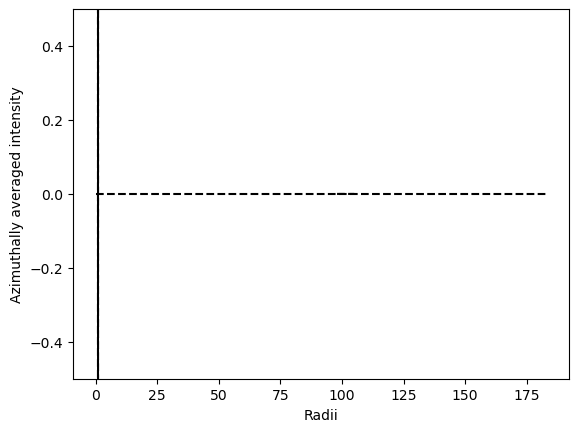

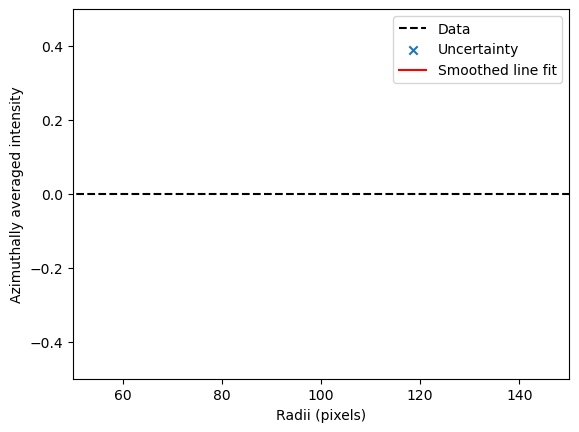

In [205]:
plt.figure()
plt.ylim(-.5,.5)
plt.hlines(0,0,len(anulus_radii),color='k',linestyle='--')
plt.scatter(anulus_radii,azimuth_averaged_intensity,marker='x')
plt.plot(simple_moving_average(simple_moving_average(azimuth_averaged_intensity,6),4),c='r')
plt.plot(exponential_moving_average(azimuth_averaged_intensity,10),c='y',linestyle='--')
plt.plot(wavelet_transform(azimuth_averaged_intensity,100),c='k',linestyle='--')
plt.fill_between(anulus_radii,azimuth_averaged_intensity-azimuth_averaged_intensity_uncertainty,azimuth_averaged_intensity+azimuth_averaged_intensity_uncertainty,alpha=0.2,color='blue')
plt.xlabel('Radii')
plt.ylabel('Azimuthally averaged intensity')
np.average(image-1000.0), np.sum(image-1000.0)

np.min(image)

def plot_azimuth_avg(OBJID,anulus_radii, azimuth_averaged_intensity,azimuth_averaged_intensity_uncertainty, negative_fraction):
    plt.figure()
    # plt.title('{} - Flux below background: {}%'.format(OBJID,np.around(negative_fraction*100,1)))
    plt.ylim(-.5,.5)
    plt.xlim(50,150)
    plt.hlines(0,0,len(anulus_radii),color='k',linestyle='--')
    plt.scatter(anulus_radii,azimuth_averaged_intensity,marker='x')
    plt.plot(simple_moving_average(simple_moving_average(azimuth_averaged_intensity,6),4),c='r')
    #plt.plot(exponential_moving_average(azimuth_averaged_intensity,10),c='y',linestyle='--')
    #plt.plot(wavelet_transform(azimuth_averaged_intensity,100),c='k',linestyle='--')
    plt.fill_between(anulus_radii,azimuth_averaged_intensity-azimuth_averaged_intensity_uncertainty,azimuth_averaged_intensity+azimuth_averaged_intensity_uncertainty,alpha=0.2,color='blue')
    plt.xlabel('Radii (pixels)')
    plt.ylabel('Azimuthally averaged intensity')
    plt.legend(['Data','Uncertainty','Smoothed line fit'],loc='upper right')
negative_fraction = len(np.argwhere(image<0))/(image.shape[0]*image.shape[1])
plot_azimuth_avg(test_candidate_U,anulus_radii, azimuth_averaged_intensity,azimuth_averaged_intensity_uncertainty,negative_fraction)

AttributeError: 'numpy.ndarray' object has no attribute 'get_array'

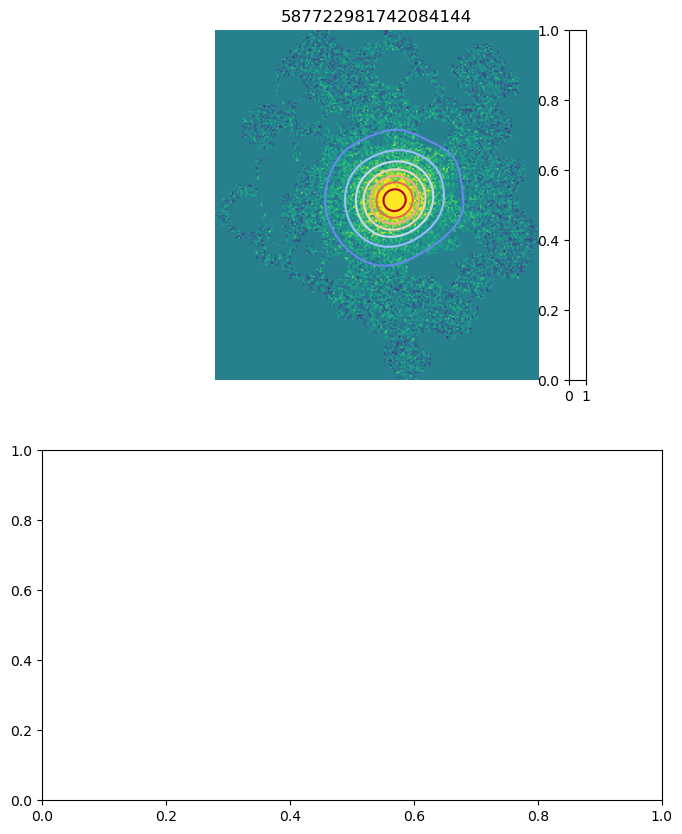

In [206]:

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# First subplot - Image with Contours
axs[0].imshow(image_w_background, vmin=np.min(image_w_background), vmax=cap, cmap='viridis')
axs[0].set_title(test_candidate_U)
axs[0].axis('off')
axs[0].contour(smoothed_image, levels=contour_levels, cmap='coolwarm')
axs[0].clabel(contours, inline=True, fontsize=8, colors='black')
fig.colorbar(image_w_background, ax=axs[0], label='Intensity (DN)')

# Second subplot - Scatter plot with Fill between
axs[1].set_ylim(-0.5, 0.5)
axs[1].hlines(0, 0, len(anulus_radii), color='k', linestyle='--')
axs[1].scatter(anulus_radii, azimuth_averaged_intensity, marker='x')
axs[1].plot(simple_moving_average(simple_moving_average(azimuth_averaged_intensity, 6), 4), c='r')
axs[1].fill_between(anulus_radii, azimuth_averaged_intensity-azimuth_averaged_intensity_uncertainty,
                    azimuth_averaged_intensity+azimuth_averaged_intensity_uncertainty, alpha=0.2, color='blue')
axs[1].set_xlabel('Radii (pixels)')
axs[1].set_ylabel('Azimuthally averaged intensity')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()

In [ ]:
negative_fraction = len(np.argwhere(image<0))/(image.shape[0]*image.shape[1])
negative_fraction

0.16856971153846154

In [ ]:
# Now run on all the candidates:

print(flux_fractions_test_U, flux_fractions_test_Z)

# Run U and Z

# Only U in test image above
anulus_radii_1, avg_intensity_1, avg_intensity_uncertainty_1, negative_1 = Azimuth_avg_intensity(test_comp_U[:,:,0],test_table_U[0])


# Both U and Z in test image above
anulus_radii_2, avg_intensity_2, avg_intensity_uncertainty_2, negative_2 = Azimuth_avg_intensity(test_comp_Z[:,:,0],test_table_Z[0])
anulus_radii_3, avg_intensity_3, avg_intensity_uncertainty_3, negative_3 = Azimuth_avg_intensity(test_comp_Z[:,:,4],test_table_Z[4])

[1.26154562 0.50238052 0.40023732 0.42163405 0.7609108 ] [1.81080497 0.49780395 0.43972581 0.5653895  1.11301104]


/tmp/ipykernel_471/3041829273.py:87: RuntimeWarning: invalid value encountered in scalar divide
  azimuth_averaged_intensity[s] = float(np.sum(mask*image)/float(mask_count[s]))


1.0
1.0
1.0


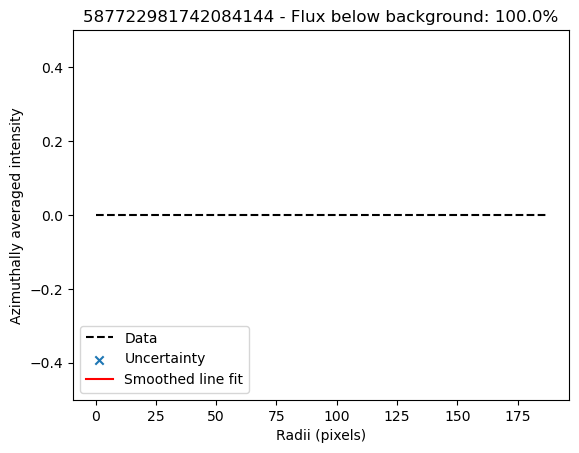

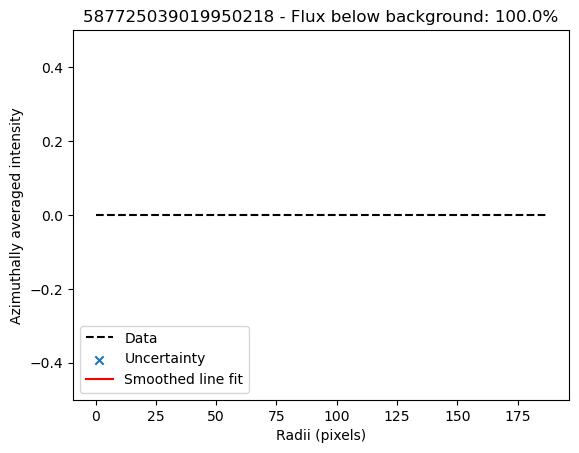

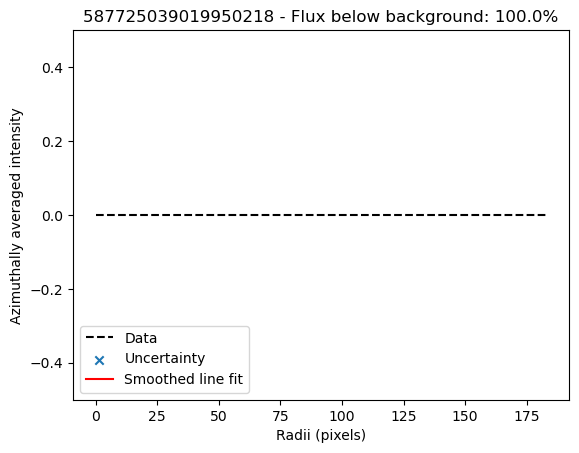

In [ ]:
# Plot:

plot_azimuth_avg(test_candidate_U,anulus_radii_1, avg_intensity_1, avg_intensity_uncertainty_1, negative_1)


plot_azimuth_avg(test_candidate_Z,anulus_radii_2, avg_intensity_2, avg_intensity_uncertainty_2, negative_2)


plot_azimuth_avg(test_candidate_Z,anulus_radii_3, avg_intensity_3, avg_intensity_uncertainty_3, negative_3)
